# **Import Packets**

In [ ]:
import json
import matplotlib.pyplot as plt
import re
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim import corpora, models
from pprint import pprint
from wordcloud import WordCloud


# **LDA topic modeling and plotting perplexity-topic curves**

[(1, -8.639079629241527),
 (2, -8.533523380689713),
 (3, -8.506525861548525),
 (4, -8.511157240350956),
 (5, -8.545918808817895),
 (6, -8.601514936564241),
 (7, -8.652225552440514),
 (8, -8.7624253245505),
 (9, -8.928383333310604),
 (10, -9.205254884539151),
 (11, -9.53335617371381),
 (12, -9.870095294510053),
 (13, -10.133958082823384),
 (14, -10.317189661228676),
 (15, -10.469085092381919),
 (16, -10.617245844279253),
 (17, -10.757940905374086),
 (18, -10.89395668033039),
 (19, -11.037214770771708),
 (20, -11.180190436469726)]


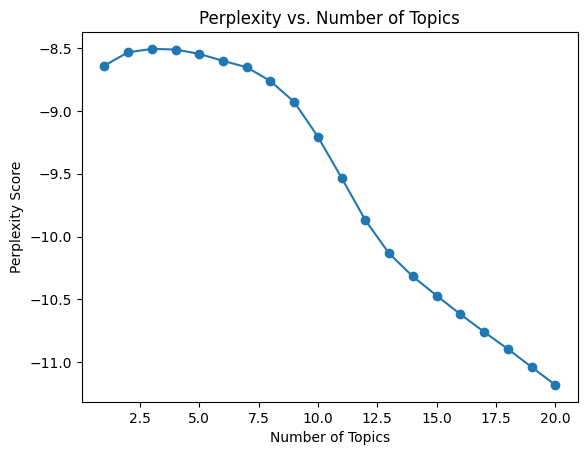

In [2]:
# Perform topic modeling
def perform_topic_modeling(samples, num_topics, dictionary, corpus):
    lda_models = []
    perplexity_scores = []

    for i in range(1, num_topics + 1):
        lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=i, passes=10, random_state=1586)
        lda_models.append(lda_model)
        perplexity_scores.append(lda_model.log_perplexity(corpus))

    # Print perplexity scores for each number of topics
    pprint(list(zip(range(1, num_topics + 1), perplexity_scores)))

    return lda_models, perplexity_scores

if __name__ == "__main__":
    # Load the processed JSON file
    processed_file_path = 'Processed_GPT_total.json'
    with open(processed_file_path, 'r') as file:
        processed_samples = json.load(file)

    # Text processing
    documents = [sample['body'] for sample in processed_samples]

    filtered_texts = []
    for document in documents:
        words = re.findall(r'\w+', document.lower())
        filtered_words = [word for word in words if word not in ['che', 'sisters', 'brothers', 'harry', 'una', 'con', 'los', 'wtf', 'nier', 'one', 'reddit', 'chatgpt', 'comment', 'post', 'bro', 'per', 'fed', 'gpt', 'models', 'conscious', 'companies', 'model', 'using', 'apps', 'mai', 'fuck', 'dude', 'jesus', 'quran', 'dan', 'que', 'sally', 'non']]
        filtered_texts.append(filtered_words)

    texts = filtered_texts

    # Create a bag-of-words model
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Perform topic modeling and get perplexity scores
    num_topics = 20  # Set the upper limit for the number of topics
    lda_models, perplexity_scores = perform_topic_modeling(processed_samples, num_topics, dictionary, corpus)

    # Plot perplexity vs. number of topics
    plt.plot(range(1, num_topics + 1), perplexity_scores, marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Perplexity Score')
    plt.title('Perplexity vs. Number of Topics')
    plt.show()


# **Print different word clouds for each topic**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.014*"like" + 0.010*"people" + 0.009*"think" + 0.008*"would" + 0.008*"get" '
  '+ 0.008*"even" + 0.006*"use" + 0.006*"time" + 0.006*"much" + 0.006*"good"'),
 (1,
  '0.064*"bot" + 0.023*"please" + 0.022*"prompt" + 0.021*"link" + 0.019*"open" '
  '+ 0.013*"questions" + 0.013*"amp" + 0.013*"message" + 0.012*"action" + '
  '0.011*"free"'),
 (2,
  '0.019*"consciousness" + 0.015*"conscious" + 0.010*"agi" + 0.008*"humans" + '
  '0.008*"brain" + 0.007*"god" + 0.007*"human" + 0.007*"believe" + '
  '0.006*"intelligence" + 0.005*"self"'),
 (3,
  '0.010*"like" + 0.008*"code" + 0.008*"use" + 0.007*"would" + 0.007*"prompt" '
  '+ 0.006*"text" + 0.005*"data" + 0.005*"language" + 0.005*"also" + '
  '0.005*"make"'),
 (4,
  '0.009*"man" + 0.006*"music" + 0.005*"art" + 0.005*"state" + 0.005*"top" + '
  '0.004*"health" + 0.004*"home" + 0.004*"quantum" + 0.004*"menu" + '
  '0.004*"fire"'),
 (5,
  '0.008*"amp" + 0.008*"world" + 0.005*"market" + 0.004*"people" + '
  '0.004*"life" + 0.004*"human" + 0

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


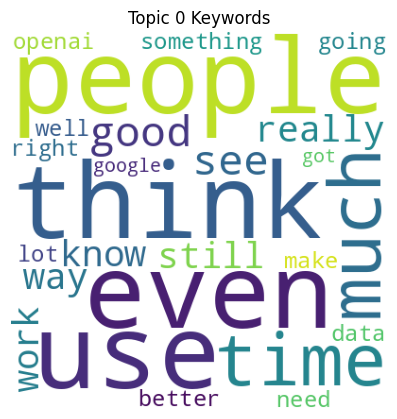

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


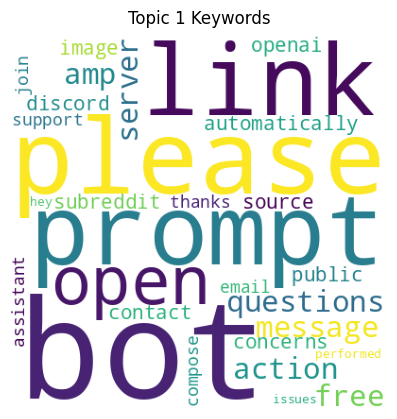

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


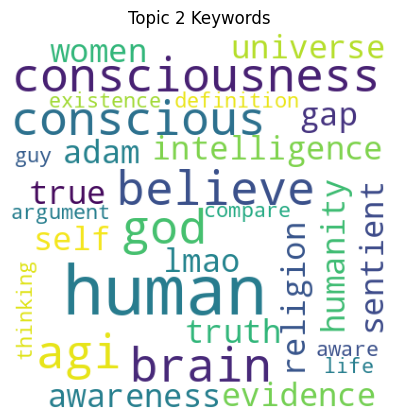

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


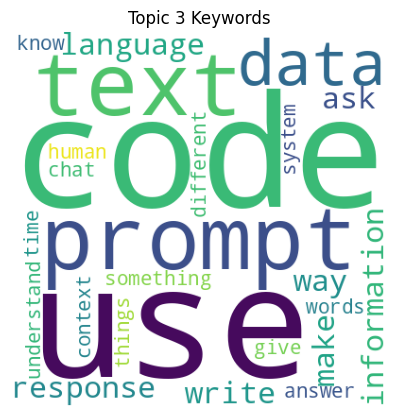

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


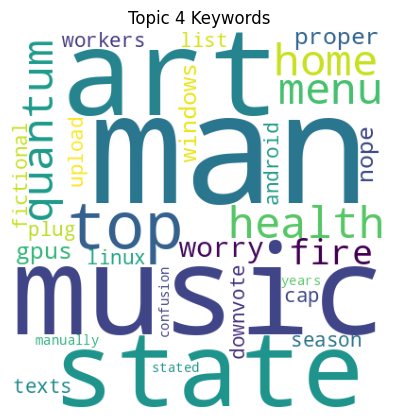

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


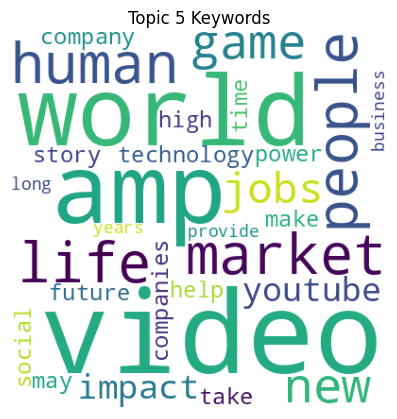

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


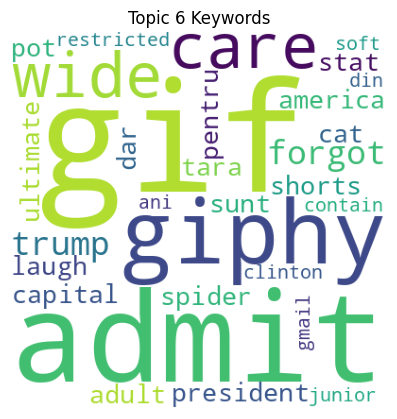

In [ ]:
# Generate a word cloud for each topic
def generate_wordcloud_for_each_topic(lda_model, num_topics=10, num_words=30):
    topics = lda_model.print_topics(num_topics=num_topics, num_words=num_words)

    for topic_id, topic_words in topics:
        keywords = re.findall(r'"([^"]*)"', topic_words)
        keywords_text = ' '.join(keywords)

        wordcloud = WordCloud(width=400, height=400,
                              background_color='white',
                              max_words=50,  # Adjust the number of words
                              colormap='viridis',
                              relative_scaling=0.3,  # Adjust word size uniformity
                              margin=2).generate(keywords_text)  # Adjust the distance between words and edges

        plt.figure(figsize=(4, 4), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(f"Topic {topic_id} Keywords")
        plt.tight_layout(pad=0)
        plt.show()

# Perform topic modeling
num_topics = 7
lda_model = perform_topic_modeling(processed_samples, num_topics, dictionary, corpus)

# Generate a word cloud for each topic
generate_wordcloud_for_each_topic(lda_model, num_topics, num_words=30)